In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import datetime

import matplotlib.style as style
%matplotlib inline
style.use('ggplot')

import warnings
warnings.simplefilter("ignore")

pd.pandas.set_option('display.max_columns',None)

In [4]:
weather = pd.read_csv('../04_weekly_weather.csv')
# Convert our report_date columns to datetime datatype
weather['date'] = pd.to_datetime(weather['date'], format="%Y-%m-%d")

# create new year and month column from datetime
weather['year'] = pd.DatetimeIndex(weather['date']).year
weather['month'] = pd.DatetimeIndex(weather['date']).month

In [6]:
zika = pd.read_csv('../zikavirus_dataset.csv')

# filter out those rows which does not contain any data
zika = zika.dropna(how = 'all')
  
# Filter all rows for which the report_date is equal to 18437
zika.drop(zika[zika['report_date'] == '18437'].index, inplace = True)

# covert string to an float
zika['cases'] = zika['cases'].astype(float)

# Replace nan value with 0,
zika['cases'] = zika['cases'].fillna(0)

# covert float to an int
zika['cases'] = zika['cases'].astype(int)

# Convert our report_date columns to datetime datatype
zika['report_date'] = pd.to_datetime(zika['report_date'], format="%Y-%m-%d")

# create new year and month column from datetime
zika['year'] = pd.DatetimeIndex(zika['report_date']).year
zika['month'] = pd.DatetimeIndex(zika['report_date']).month

# 1 Colombia

In [8]:
colom_zika = zika[zika["location"].str.startswith("Colombia")]
colom_zika.head()

,report_date,location,location_type,data_field,cases,year,month
15347,2016-01-14,Colombia-Antioquia-Medellin,municipality,zika_confirmed_laboratory_pregnant,0,2016.0,1.0
15348,2016-01-14,Colombia-Antioquia-Barbosa,municipality,zika_confirmed_laboratory_pregnant,0,2016.0,1.0
15349,2016-01-14,Colombia-Antioquia-Unknown,municipality,zika_confirmed_laboratory_pregnant,1,2016.0,1.0
15350,2016-01-14,Colombia-Arauca-Arauca,municipality,zika_confirmed_laboratory_pregnant,1,2016.0,1.0
15351,2016-01-14,Colombia-Arauca-Fortul,municipality,zika_confirmed_laboratory_pregnant,0,2016.0,1.0


In [10]:
colom_zika.shape

(158440, 7)

### 1.1 Data fields

In [11]:
colom_zika.data_field.unique()

array(['zika_confirmed_laboratory_pregnant', 'zika_suspected_pregnant',
       'zika_confirmed_clinic_pregnant', 'zika_suspected_clinic_pregnant',
       'neurological_syndrome_zika_positive', 'zika_confirmed_laboratory',
       'zika_suspected_clinic', 'zika_suspected',
       'microcephaly_cumulative_2017', 'zika_confirmed_clinic',
       'microcephaly_cumulative_2016_2017'], dtype=object)

In [12]:
colombiaCases = colom_zika.loc[(colom_zika['data_field'] == 'zika_confirmed_laboratory') & (colom_zika['location_type'] == 'province')]
colombiaCases = colombiaCases.sort_values(by=['report_date'])
colombiaCases.head()

,report_date,location,location_type,data_field,cases,year,month
90615,2017-01-14,Colombia-Valle,province,zika_confirmed_laboratory,0,2017.0,1.0
90636,2017-01-14,Colombia-Cordoba,province,zika_confirmed_laboratory,0,2017.0,1.0
90637,2017-01-14,Colombia-Santa_Marta,province,zika_confirmed_laboratory,0,2017.0,1.0
90638,2017-01-14,Colombia-Magdalena,province,zika_confirmed_laboratory,0,2017.0,1.0
90639,2017-01-14,Colombia-Caqueta,province,zika_confirmed_laboratory,0,2017.0,1.0


### 1.2 Country wise cases

In [14]:
# Countries with zero case
total_cases = colombiaCases.groupby(['location']).cases.agg([sum])
total_cases.sort_values('sum', ascending=False).head()

,sum
location,
Colombia-Valle,99
Colombia-Santander,84
Colombia-Atlantico,79
Colombia-Norte_Santander,70
Colombia-Tolima,64


In [15]:
# remove countries with zero case
cases = total_cases[total_cases['sum'] == 0]
cases.index

Index(['Colombia-Amazonas', 'Colombia-Bogota', 'Colombia-Buenaventura',
       'Colombia-Choco', 'Colombia-Guainia', 'Colombia-Guaviare',
       'Colombia-San_Andres', 'Colombia-Santa_Marta', 'Colombia-Vichada',
       'Colombia-desconocido', 'Colombia-unknown'],
      dtype='object', name='location')

### 1.3 Analyse the pattern of spreading virus  in Valle

In [19]:
valle_zika = colombiaCases[colombiaCases['location'] == 'Colombia-Valle']
valle_zika = valle_zika.sort_values(by=['report_date'])
valle_zika.head()

,report_date,location,location_type,data_field,cases,year,month
90615,2017-01-14,Colombia-Valle,province,zika_confirmed_laboratory,0,2017.0,1.0
90844,2017-01-21,Colombia-Valle,province,zika_confirmed_laboratory,0,2017.0,1.0
90998,2017-01-28,Colombia-Valle,province,zika_confirmed_laboratory,0,2017.0,1.0
91128,2017-02-04,Colombia-Valle,province,zika_confirmed_laboratory,0,2017.0,2.0
91267,2017-02-11,Colombia-Valle,province,zika_confirmed_laboratory,0,2017.0,2.0


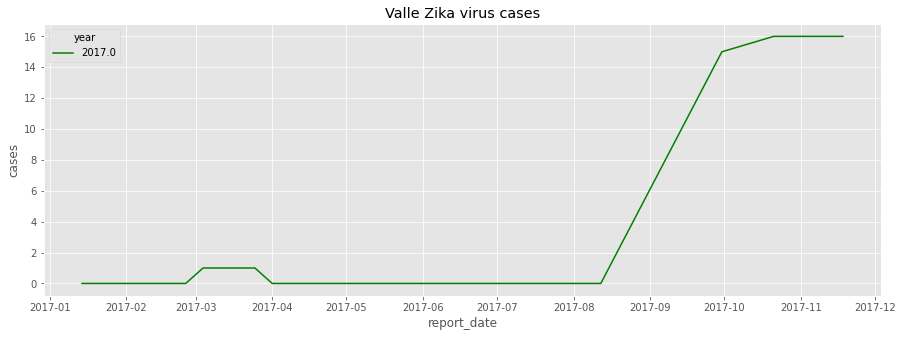

In [24]:
plt.figure(figsize=(15,5))
sns.lineplot(x='report_date', y='cases', hue='year',data=valle_zika,palette=['green'])
plt.title('Valle Zika virus cases')
plt.show()

### 1.4 Analyse the pattern of spreading virus in Colombia

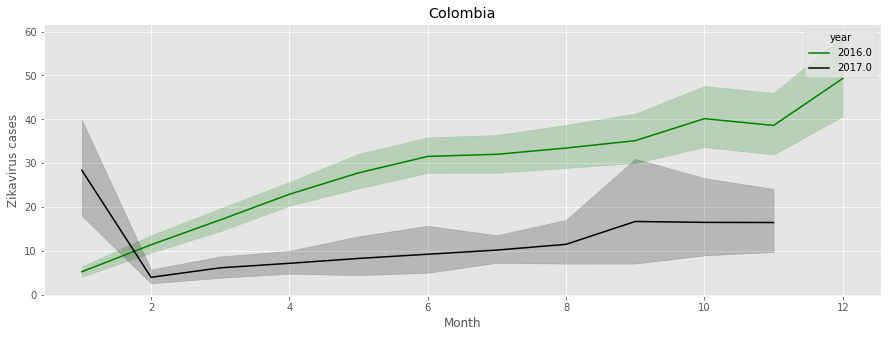

In [33]:
plt.figure(figsize=(15,5))
sns.lineplot(x='month', y='cases', hue='year',data=colom_zika,palette=['green','black'])
plt.title('Colombia')
plt.xlabel('Month')
plt.ylabel('Zikavirus cases')
plt.show()

Let's analyse the confirmed cases of zika virus with three environmental factors such as max temperature, dew point, precipitation and wind. And also considering the incubation period 3–14 days.

### 1.5 Analysis the weather of Valle 99 cases

In [26]:
valle = valle_zika.groupby(['report_date']).cases.agg([sum])
valle = valle.reset_index()

In [27]:
valle

,report_date,sum
0,2017-01-14,0
1,2017-01-21,0
2,2017-01-28,0
3,2017-02-04,0
4,2017-02-11,0
5,2017-02-18,0
6,2017-02-25,0
7,2017-03-04,1
8,2017-03-11,1
9,2017-03-18,1


### 1.7 Valle Weather

In [34]:
VallleWeather = pd.read_csv('Colombia-Valle.csv')
VallleWeather.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
0,2017-01-14,32,19,0.0,11.6,7,86,08:20 PM,07:59 AM,06:10 AM,06:07 PM,17,26,26,25,5,31,66,0.3,1014,32,10,62,3,Colombia-Valle
1,2017-01-15,34,20,0.0,11.6,6,79,09:11 PM,08:49 AM,06:10 AM,06:07 PM,17,26,26,25,5,37,62,3.0,1013,34,10,120,3,Colombia-Valle
2,2017-01-16,36,20,0.0,11.6,7,71,09:59 PM,09:37 AM,06:10 AM,06:07 PM,17,27,27,26,5,33,63,1.4,1013,36,10,167,3,Colombia-Valle
3,2017-01-17,34,20,0.0,11.6,7,64,10:45 PM,10:21 AM,06:10 AM,06:08 PM,17,27,27,25,4,23,65,5.7,1014,34,10,224,3,Colombia-Valle
4,2017-01-18,36,20,0.0,11.6,7,57,11:30 PM,11:05 AM,06:11 AM,06:08 PM,17,27,27,26,4,20,62,5.1,1014,36,10,200,2,Colombia-Valle


In [35]:
# Convert our report_date columns to datetime datatype
VallleWeather['date_time'] = pd.to_datetime(VallleWeather['date_time'], format="%Y-%m-%d")

# create new year and month column from datetime
VallleWeather['year'] = pd.DatetimeIndex(VallleWeather['date_time']).year
VallleWeather['month'] = pd.DatetimeIndex(VallleWeather['date_time']).month

### Case 1
* Report date - 2017-01-28 = 0
* weather date - 2017-01-14 to 	2017-01-28

Text(0.5, 1.0, 'Humidity')

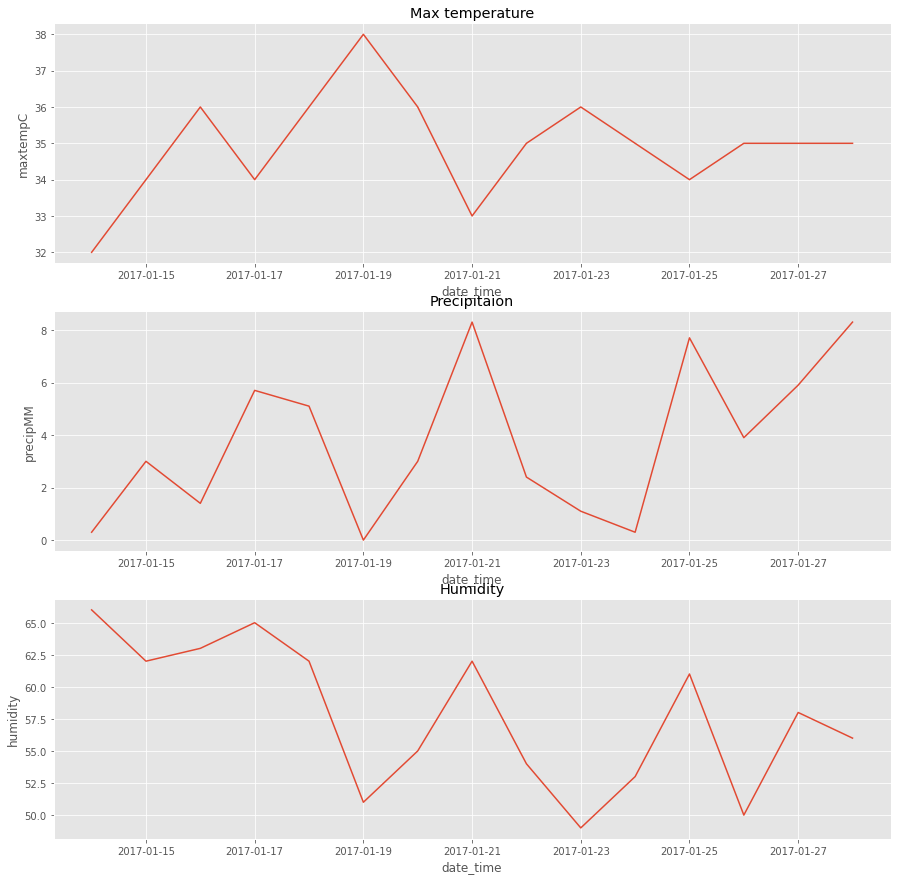

In [36]:
valle_case1 = VallleWeather.loc[(VallleWeather['date_time'] >= '2017-01-14') & (VallleWeather['date_time'] <= '2017-01-28')]
fig, axes = plt.subplots(3,1, figsize=(15, 15))
sns.lineplot(ax=axes[0],x='date_time',y='maxtempC',data=valle_case1)
axes[0].set_title('Max temperature')
sns.lineplot(ax=axes[1],x='date_time',y='precipMM',data=valle_case1)
axes[1].set_title('Precipitaion')
sns.lineplot(ax=axes[2],x='date_time',y='humidity',data=valle_case1)
axes[2].set_title('Humidity')

### Case 2
* Report date - 2017-02-18 = 0
* weather date - 2017-02-04  to 2017-02-18

Text(0.5, 1.0, 'Humidity')

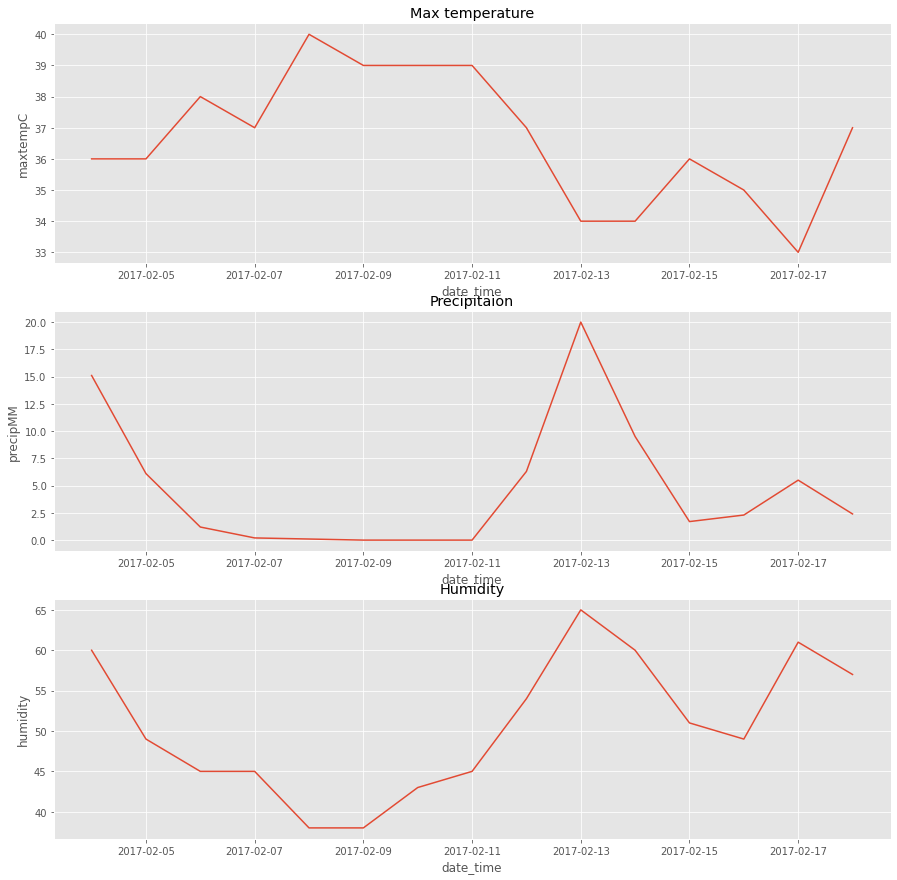

In [38]:
valle_case2 = VallleWeather.loc[(VallleWeather['date_time'] >= '2017-02-04') & (VallleWeather['date_time'] <= '2017-02-18')]
fig, axes = plt.subplots(3,1, figsize=(15, 15))
sns.lineplot(ax=axes[0],x='date_time',y='maxtempC',data=valle_case2)
axes[0].set_title('Max temperature')
sns.lineplot(ax=axes[1],x='date_time',y='precipMM',data=valle_case2)
axes[1].set_title('Precipitaion')
sns.lineplot(ax=axes[2],x='date_time',y='humidity',data=valle_case2)
axes[2].set_title('Humidity')

### Case 3
* Report date - 2017-03-04 = 1
* weather date - 2017-02-18  to 2017-03-04

Text(0.5, 1.0, 'Humidity')

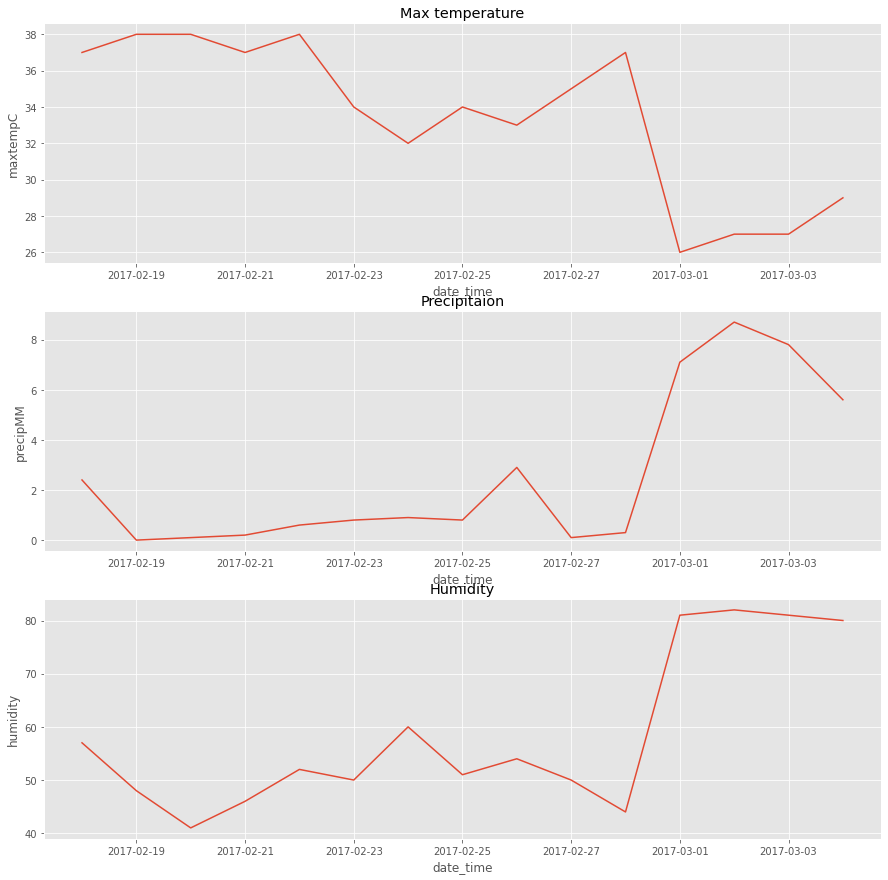

In [39]:
valle_case3 = VallleWeather.loc[(VallleWeather['date_time'] >= '2017-02-18') & (VallleWeather['date_time'] <= '2017-03-04')]
fig, axes = plt.subplots(3,1, figsize=(15, 15))
sns.lineplot(ax=axes[0],x='date_time',y='maxtempC',data=valle_case3)
axes[0].set_title('Max temperature')
sns.lineplot(ax=axes[1],x='date_time',y='precipMM',data=valle_case3)
axes[1].set_title('Precipitaion')
sns.lineplot(ax=axes[2],x='date_time',y='humidity',data=valle_case3)
axes[2].set_title('Humidity')

### Case 4
* Report date - 2017-07-29 = 0
* weather date - 2017-07-17 to 2017-07-29

Text(0.5, 1.0, 'Humidity')

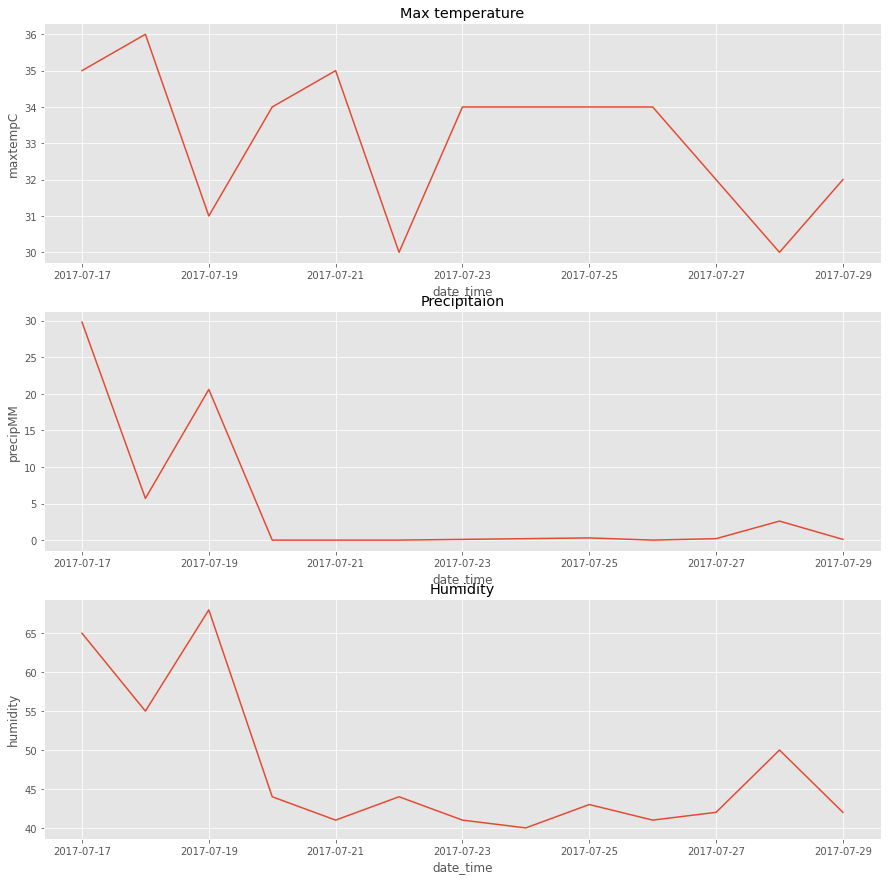

In [40]:
valle_case4 = VallleWeather.loc[(VallleWeather['date_time'] >= '2017-07-17') & (VallleWeather['date_time'] <= '2017-07-29')]
fig, axes = plt.subplots(3,1, figsize=(15, 15))
sns.lineplot(ax=axes[0],x='date_time',y='maxtempC',data=valle_case4)
axes[0].set_title('Max temperature')
sns.lineplot(ax=axes[1],x='date_time',y='precipMM',data=valle_case4)
axes[1].set_title('Precipitaion')
sns.lineplot(ax=axes[2],x='date_time',y='humidity',data=valle_case4)
axes[2].set_title('Humidity')

### Case 5
* Report date - 2017-09-30 = 15
* weather date - 2017-08-05 to 2017-09-30

Text(0.5, 1.0, 'Humidity')

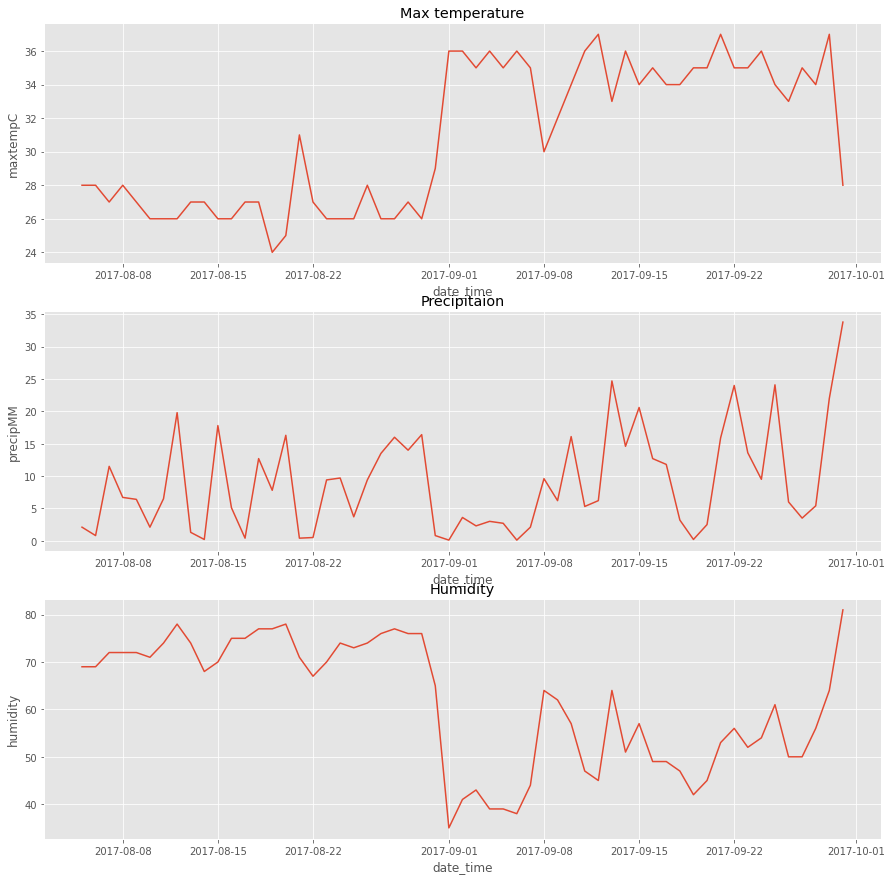

In [42]:
valle_case5 = VallleWeather.loc[(VallleWeather['date_time'] >= '2017-08-05') & (VallleWeather['date_time'] <= '2017-09-30')]
fig, axes = plt.subplots(3,1, figsize=(15, 15))
sns.lineplot(ax=axes[0],x='date_time',y='maxtempC',data=valle_case5)
axes[0].set_title('Max temperature')
sns.lineplot(ax=axes[1],x='date_time',y='precipMM',data=valle_case5)
axes[1].set_title('Precipitaion')
sns.lineplot(ax=axes[2],x='date_time',y='humidity',data=valle_case5)
axes[2].set_title('Humidity')

### Case 6
* Report date - 2017-11-11 = 16
* weather date - 2017-10-28 to 2017-11-11

Text(0.5, 1.0, 'Humidity')

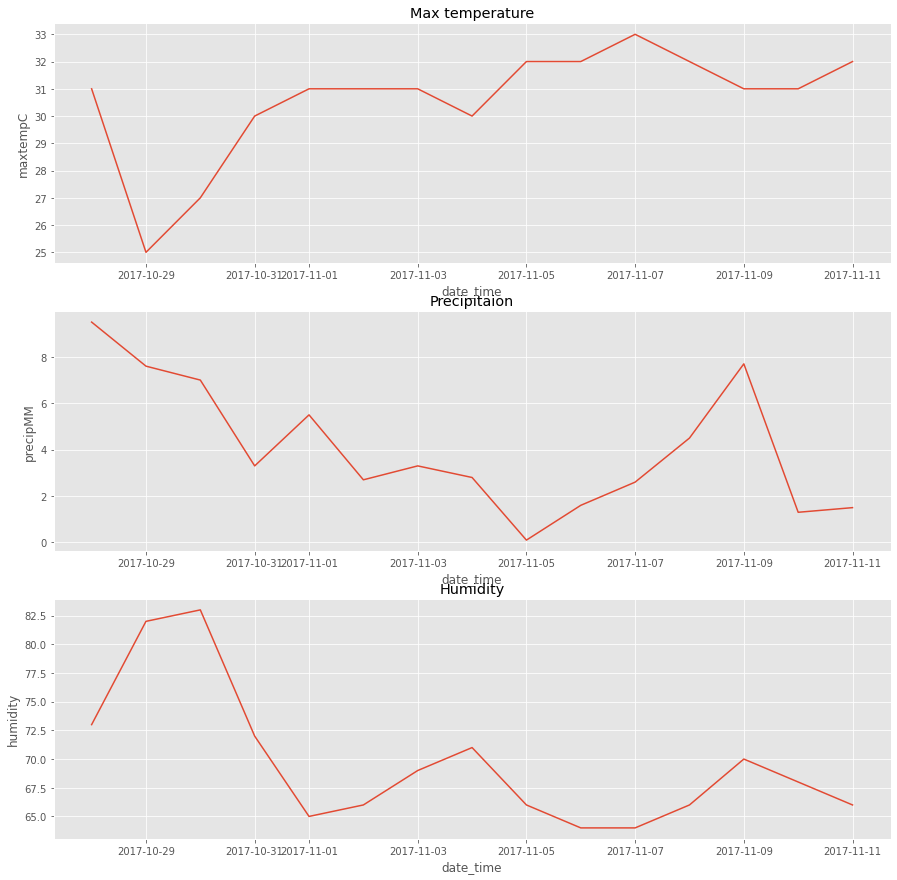

In [44]:
valle_case6 = VallleWeather.loc[(VallleWeather['date_time'] >= '2017-10-28') & (VallleWeather['date_time'] <= '2017-11-11')]
fig, axes = plt.subplots(3,1, figsize=(15, 15))
sns.lineplot(ax=axes[0],x='date_time',y='maxtempC',data=valle_case6)
axes[0].set_title('Max temperature')
sns.lineplot(ax=axes[1],x='date_time',y='precipMM',data=valle_case6)
axes[1].set_title('Precipitaion')
sns.lineplot(ax=axes[2],x='date_time',y='humidity',data=valle_case6)
axes[2].set_title('Humidity')

In [ ]:
VallleWeather

Text(0.5, 1.0, 'Humidity')

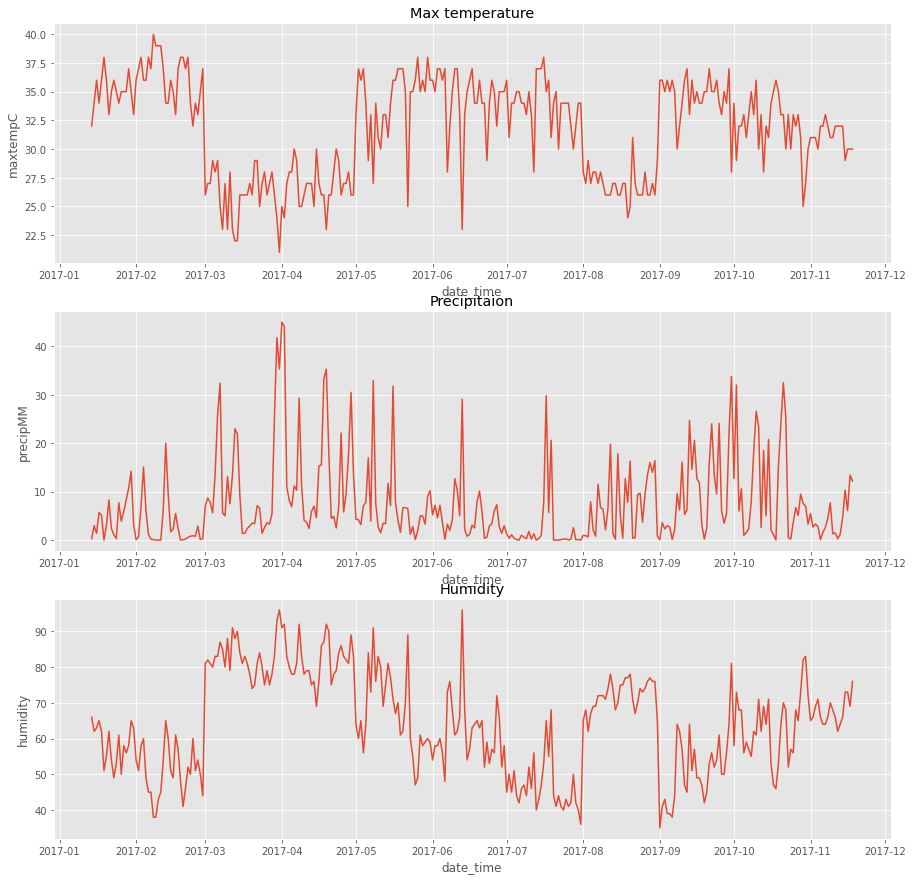

In [46]:
fig, axes = plt.subplots(3,1, figsize=(15, 15))
sns.lineplot(ax=axes[0],x='date_time',y='maxtempC',data=VallleWeather)
axes[0].set_title('Max temperature')
sns.lineplot(ax=axes[1],x='date_time',y='precipMM',data=VallleWeather)
axes[1].set_title('Precipitaion')
sns.lineplot(ax=axes[2],x='date_time',y='humidity',data=VallleWeather)
axes[2].set_title('Humidity')

In [47]:
valle_cases = valle.rename(columns={"report_date": "date_time"})
VallleWeather = VallleWeather[['date_time','maxtempC','precipMM','humidity']]
valle_case = pd.merge(valle_cases,VallleWeather, on=['date_time'], how='left') 
valle_case.head()

,date_time,sum,maxtempC,precipMM,humidity
0,2017-01-14,0,32,0.3,66
1,2017-01-21,0,33,8.3,62
2,2017-01-28,0,35,8.3,56
3,2017-02-04,0,36,15.1,60
4,2017-02-11,0,39,0.0,45


Text(0.5, 1.0, 'Humidity')

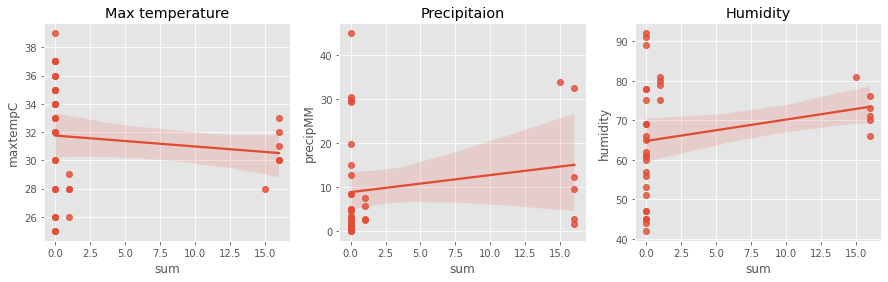

In [48]:
fig, axes = plt.subplots(1,3, figsize=(15, 4))
sns.regplot(ax=axes[0],y=valle_case['maxtempC'], x=valle_case['sum'])
axes[0].set_title('Max temperature')
sns.regplot(ax=axes[1],y=valle_case['precipMM'], x=valle_case['sum'])
axes[1].set_title('Precipitaion')
sns.regplot(ax=axes[2],y=valle_case['humidity'], x=valle_case['sum'])
axes[2].set_title('Humidity')

<AxesSubplot:>

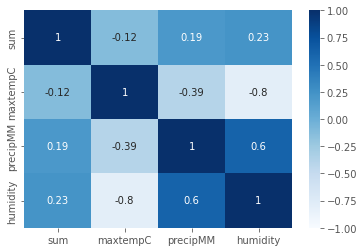

In [49]:
sns.heatmap(valle_case.corr(),cmap='Blues',annot=True,vmax=1,vmin=-1) 